<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/Exp_13/Exp_13_J058_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd 


In [2]:
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
df.replace(to_replace=-200.0, value=0.0, inplace=True)
wv = df['NMHC(GT)']
bad_wv = wv == -200.0
wv[bad_wv] = 0.0


--2020-10-30 05:13:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  1.57MB/s    in 0.9s    

2020-10-30 05:13:10 (1.57 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
data= df

In [13]:
data.head()

,Date_Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.00000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.59962,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.35832,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.90000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.95000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.20000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.07500,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.60000,88.725000,2.231036


In [7]:
data.shape

(9357, 14)

In [8]:
import numpy as np
data.replace(to_replace = -200,value = np.NaN , inplace = True )

In [9]:
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date_Time        0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [10]:
data.drop(['NMHC(GT)'], axis= 1, inplace= True)
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date_Time        0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [14]:
data["T"] = data.groupby("Date_Time")["T"].transform(lambda x: x.fillna(x.mean()))
data["CO(GT)"] = data.groupby("Date_Time")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NOx(GT)"] = data.groupby("Date_Time")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NO2(GT)"] = data.groupby("Date_Time")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

In [15]:
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date_Time        0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

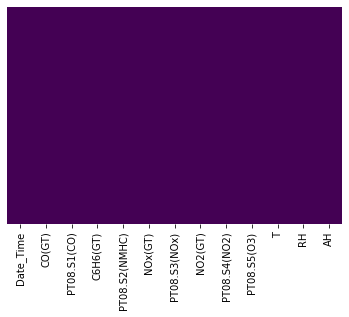

In [16]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data.fillna(method='ffill', inplace= True)

In [18]:
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date_Time        0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [20]:
X1 = data.drop(['Date_Time'], axis=1, inplace=False)
X = X1

In [21]:
from sklearn.cluster import Birch
birch = Birch()
birch.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [23]:
agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [24]:
from sklearn.cluster import SpectralClustering

In [ ]:
spclus = SpectralClustering()
spclus.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
